## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Read the data file and review the dataframe

##### Column Names and descriptions for Kings County Data Set
* id - unique identified for a house
* date - when a house was sold
* price - is prediction target
* bedrooms - of Bedrooms/House
* bathrooms - of bathrooms/bedrooms
* sqft_living - footage of the home
* sqft_lot - footage of the lot
* floors - floors (levels) in house
* waterfront - house which has a view to a waterfront
* view - number of views of a house
* condition - how good the condition is ( Overall )
* grade - overall grade given to the housing unit, based on King County grading system
* sqft_above - square footage of house apart from basement
* sqft_basement - square footage of the basement
* yr_built - built year
* yr_renovated - year when house was renovated
* zipcode - zipcode of the house
* lat - latitude coordinate
* long - longitude coordinate
* sqft_living15 - the square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - the square footage of the land lots of the nearest 15 neighbors

In [2]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


## General info about the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Check the missing values in the dataset

In [4]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Data Cleaning

### Re-format the type of the 'date' column

In [5]:
df['date'] = pd.to_datetime(df['date'])
print(df['date'].dtype)

datetime64[ns]


### Deal with missing values

In [6]:
# Summarizing the data values in 'waterfront' column
df.groupby(by = 'waterfront')['waterfront'].count().sort_values(ascending = False)

waterfront
0.0    19075
1.0      146
Name: waterfront, dtype: int64

About 88% of data in 'waterfront' column has a value of 0 (means that the house has no waterfront view). The NaN values are about 11% of the column data. Therefore, the missing values in 'waterfront' column are replaced with the value of 0. 

In [7]:
# Replace NaN with 0.0 and check the missing values again
df['waterfront'] = df['waterfront'].fillna(0.0)
df['waterfront'].isna().sum()

0

In [8]:
# Summarizing the data values in 'view' column
df.groupby(by = 'view')['view'].count().sort_values(ascending = False)

view
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

Most of the values (about 90%) in 'view' column are 0.0  and the missing values are only 0.29% of the column data. Therefore, the NaN values in this column are replaced with 0.0 

In [9]:
# Replace NaN with 0.0 and check the missing values again
df['view'] = df['view'].fillna(0.0)
df['view'].isna().sum()

0

In [10]:
# Summarizing the data values in 'yr_renovated' column
df.groupby(by = 'yr_renovated')['yr_renovated'].count().sort_values(ascending = False)

yr_renovated
0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1954.0        1
1971.0        1
1959.0        1
Name: yr_renovated, Length: 70, dtype: int64

Most of the values (about 79%) in the 'yr_renovated' columns are 0.0 which means that the renovated year for most of the houses are unknown. Therefore, it is best to drop the column as replacing NaN with the median of the coumn is useless.

In [11]:
df = df.drop('yr_renovated', axis=1).copy()

In [12]:
# Summarizing the data values in 'sqft_basement' column
df.groupby(by = 'sqft_basement')['sqft_basement'].count().sort_values(ascending = False)

sqft_basement
0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2360.0        1
2350.0        1
2310.0        1
2300.0        1
2190.0        1
Name: sqft_basement, Length: 304, dtype: int64

More than half of the values (~59%) in 'sqft_basement' column is 0.0 which means no basement and only 2% of the data is unknown as indicated as '?'. Since the majority of the data is 0.0 or unknown ('?'), it is best to change this data into a binary data: 0 for no basement and 1 for having a basement. 

In [13]:
# Replace unknown values in 'sqft_basement' with 0
df['sqft_basement'][df['sqft_basement']== '?'] = '0.0'

# Replace the non-zero values with 1
df['sqft_basement'][df['sqft_basement']!= '0.0'] = 1

# Rename the 'sqft_basement' to 'basement'
df = df.rename(columns={'sqft_basement':'basement'}).copy()
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


In [14]:
# Change the datatype of 'basement' column
from numpy import float64
df['basement'] = df['basement'].astype(str).astype('float64')

In [15]:
# Summarizing the data values in 'sqft_basement2' column
df.groupby(by = 'basement')['basement'].count().sort_values(ascending = False)

basement
0.0    13280
1.0     8317
Name: basement, dtype: int64

Check the dataset general information and missing values again

In [16]:
print(df.info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  float64       
 9   view           21597 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  basement       21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  zipcode        2159

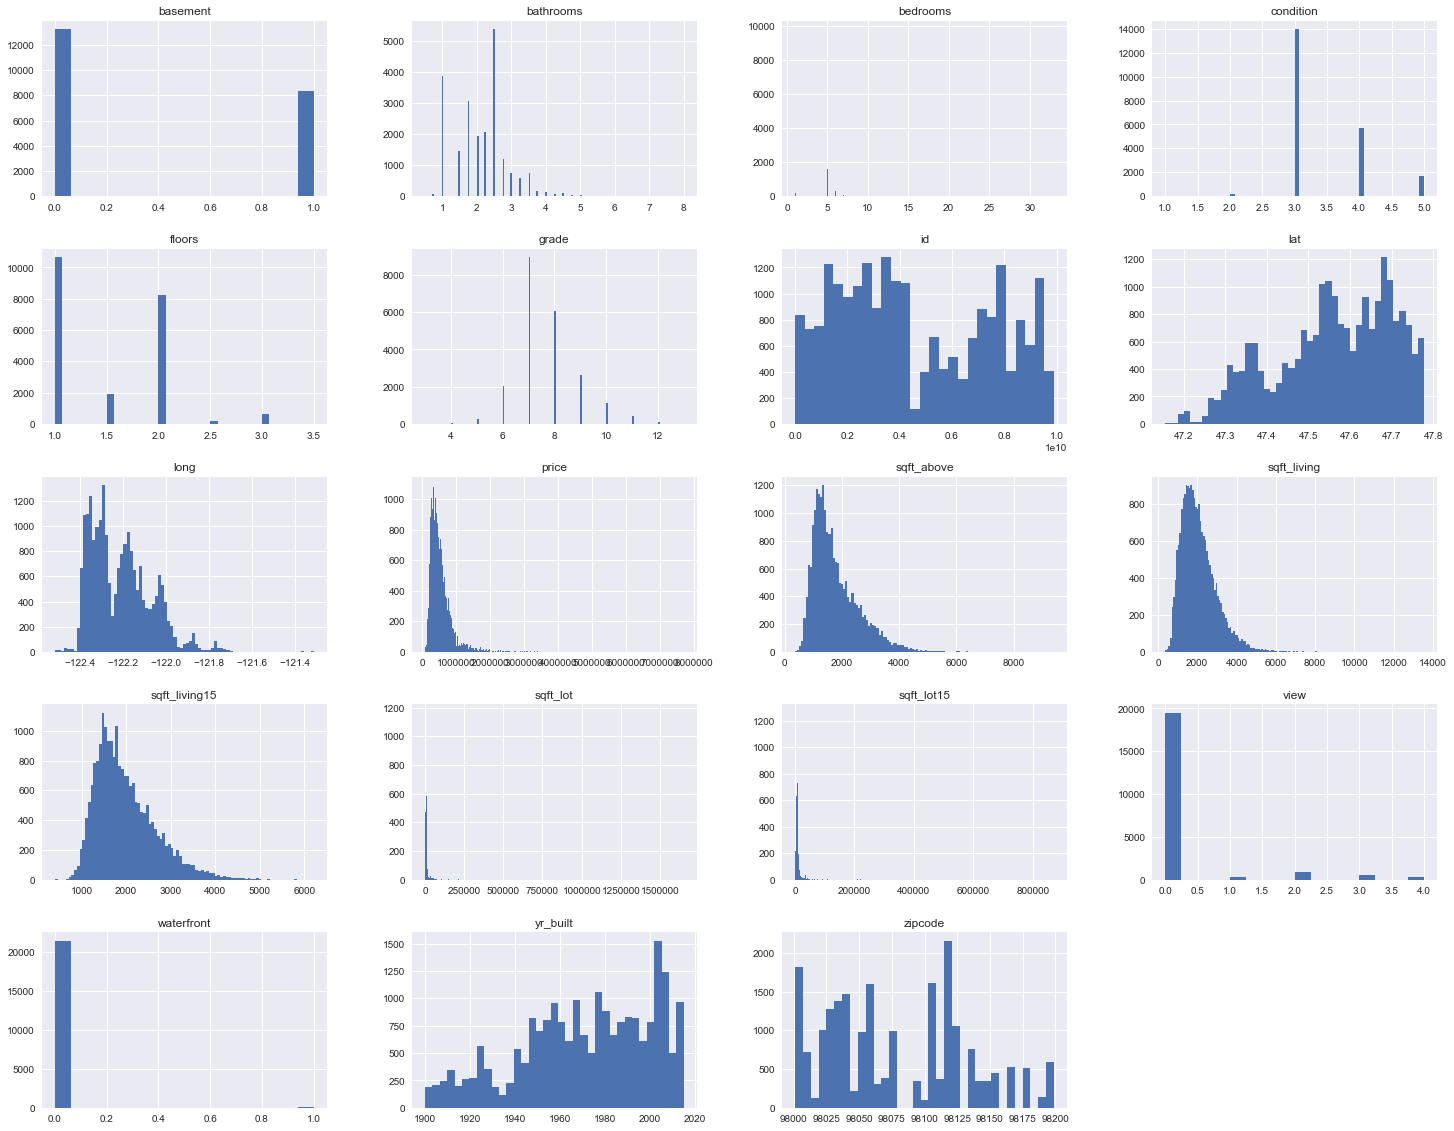

In [17]:
df.hist(figsize=(25,20), bins='auto');

### Check for outliers 

In [18]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.00000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,0.38510,1970.999676,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,0.48663,29.375234,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.00000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.00000,1951.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.00000,1975.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1.00000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,1.00000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Looking at the histograms of all features and the statistics summary table above, there are a lot of unrealistic outliers in the dataset. For instance, the number of bedrooms run to more than 30 bedrooms to the sale price of the house run to more $8 millions dollars. Therefore, we omit theses outliers for more accurate final results. 

The major outlier in 'bedroom' is dropped and the 'price' is cut to $950,000 where the graph starts to skewed.

In [19]:
df = df.drop(df.index[df['bedrooms'] == 33]).copy()
df = df.loc[(df['price'] <= 950000)].copy()

### Check for duplicate values

The 'id' column is the column that supposed to have unique values as it is the unique number to identify each house. Therefore, any existing duplicates in 'id' column are eliminated from the dataset.

In [20]:
len(df[df['id'].duplicated()])

169

In [21]:
df.drop_duplicates(subset='id', inplace=True)

Now that the dataset is cleaned from missing values and duplicated values. We can also drop the 'id' column as it is not beneficial to our models later.

In [22]:
df = df.drop('id', axis=1).copy()
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1.0,1951,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1.0,1965,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19704 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           19704 non-null  datetime64[ns]
 1   price          19704 non-null  float64       
 2   bedrooms       19704 non-null  int64         
 3   bathrooms      19704 non-null  float64       
 4   sqft_living    19704 non-null  int64         
 5   sqft_lot       19704 non-null  int64         
 6   floors         19704 non-null  float64       
 7   waterfront     19704 non-null  float64       
 8   view           19704 non-null  float64       
 9   condition      19704 non-null  int64         
 10  grade          19704 non-null  int64         
 11  sqft_above     19704 non-null  int64         
 12  basement       19704 non-null  float64       
 13  yr_built       19704 non-null  int64         
 14  zipcode        19704 non-null  int64         
 15  lat            1970

## Save cleaned dataset into a new csv file

Save the clean data into 'cleaned_kc_house_data.csv' for later analysis 

In [24]:
df.to_csv('cleaned_kc_house_data.csv')